# FM CW LAYDAR

In [163]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 変数定義

c: 光速[m/s]

v0: 自物の速度[m/s]

v1: 目標物の速度[m/s]

r: 相対距離[m]

dt: 時間分解能

fout_avg: 出力周波数[Hz]

fout_max: 最高出力周波数[Hz]

fout_min: 最低出力周波数[Hz]

dfdt: 時間毎の出力周波数変化幅[Hz]

t: 時間


In [255]:
c = 2.99792458 * 10**8

v0 = 0
v1 = 3 * 10**5 #時速100km/h相当
r = c

dt = 1 * 10 **(-9)
fout_avg = 79 * 10**9
fout_max = 80 * 10**9
fout_min = 78 * 10**9
dfdt = 0.1 * 10 **9

t = np.arange(0, 5*10**(-8), dt)

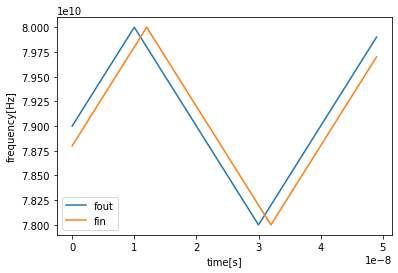

In [258]:
fout = []
ff = fout_avg
code = 1
for tt in t:
    fout.append(ff)
    ff = ff + code * dfdt
    if ff >= fout_max:
        code = -1
    elif ff <= fout_min:
        code = 1
fout = np.array(fout)

dt = 2 * r / c

fout2 = []
ff = fout_avg - dfdt * dt
code = 1
for tt in t:
    fout2.append(ff)
    ff = ff + code * dfdt
    if ff >= fout_max:
        code = -1
    elif ff <= fout_min:
        code = 1
fout2 = np.array(fout2)
#fin = fout2 * (c - v0) / (c - v1)
fin = fout2

plt.xlabel("time[s]")
plt.ylabel("frequency[Hz]")
plt.plot(t, fout, label="fout")
#plt.plot(t, fout2, label="fout2")
plt.plot(t, fin, label="fin")
plt.legend()
plt.show()

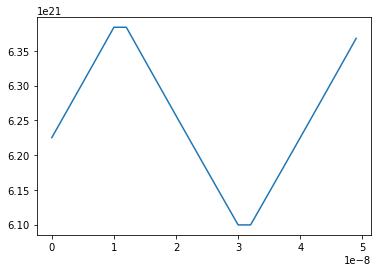

In [259]:
fout_in = fout * fin
plt.plot(t, fout_in)

In [166]:
q = 100*1000/60/60
print(q)

27.77777777777778
